# Тестовое для SkyDNS

>Это csv-файл, пожатый gzipом. Там четыре колонки:

    client_id – идентификатор пользователя
    hour – отсечка времени, час
    requests – Общее количество запросов от этого пользователя за этот час
    requests_blocked – Число заблокированных запросов пользователя за этот час.

>Следует иметь в виду, что время фиксируется на сервере, а клиенты могут быть в разных часовых поясах (от Владивостока до Калининграда)
>
>Вопрос, на который нужно найти ответ: какие из пользователей являются физическими лицами, а какие – юридическими. Обратите внимание, что эту задачу нельзя решить правильно в строгом смысле этого слова: любое решение, даже случайное угадывание, с формальной точки зрения, будет являться решением. Вам предстоит свое решение обосновать. Ответьте, пожалуйста, на вопрос: “Почему можно утверждать, что задача решена?”.
>
>У нас есть принятое за эталон решение этой задачи, которое нам кажется достаточно убедительным. Хотелось бы 
увидеть что-то подобное и у Вас.

Для решения будем использовать, само собой, ipython, а также pandas, numpy в его составе и matplotlib

Решение будем искать из того соображения, что число запросов юридических лиц повторяется более явно, недели физических.

Проверим:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

data = pd.read_csv('skydns_testproblem')
x = data[['client_id', 'requests', 'requests_blocked']].set_index(['client_id'])

FileNotFoundError: File b'skydns_testproblem' does not exist

(0, 14256L)


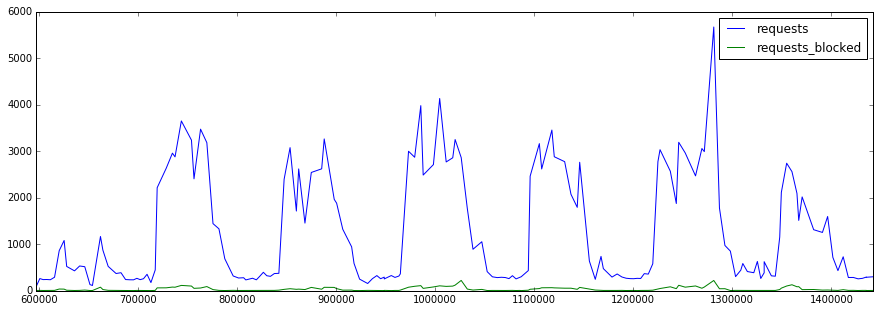

(1, 15091L)


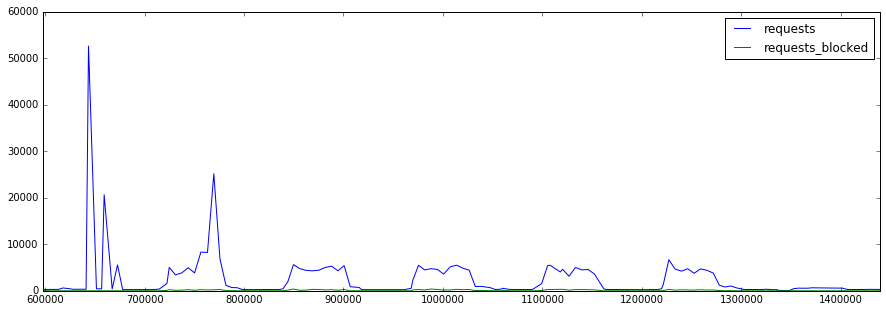

(2, 9765L)


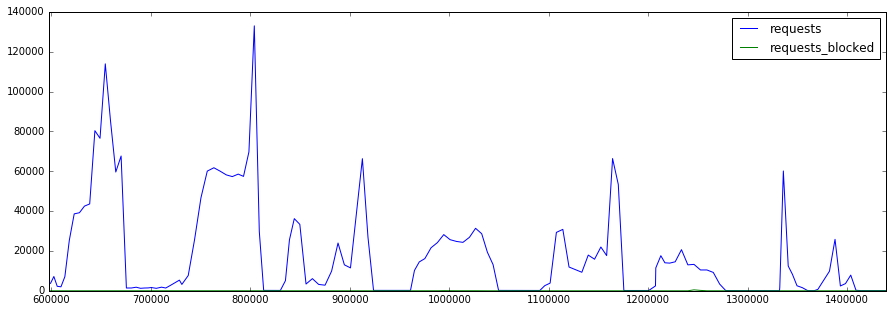

(3, 1287L)


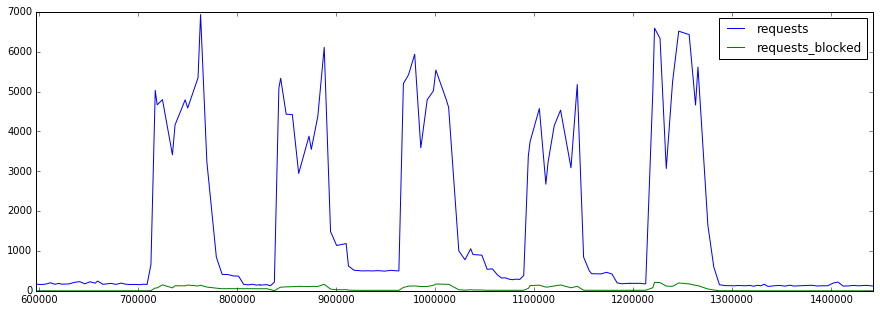

(4, 15092L)


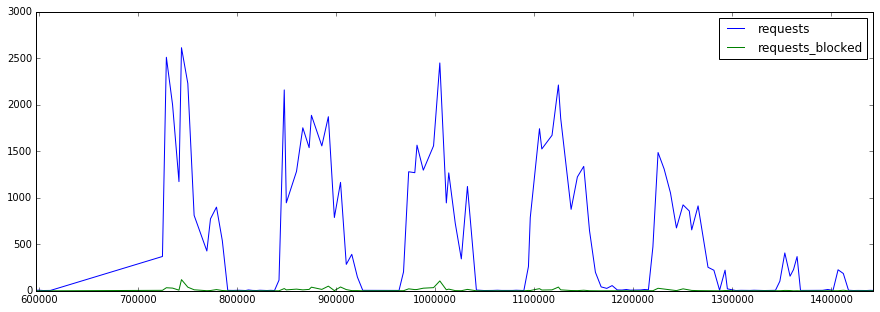

(5, 9587L)


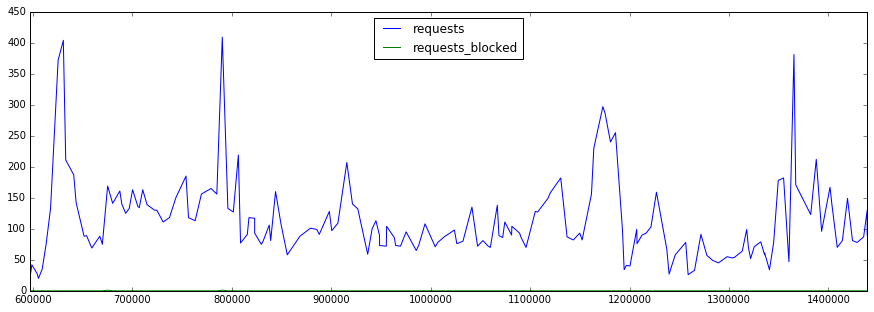

(6, 16881L)


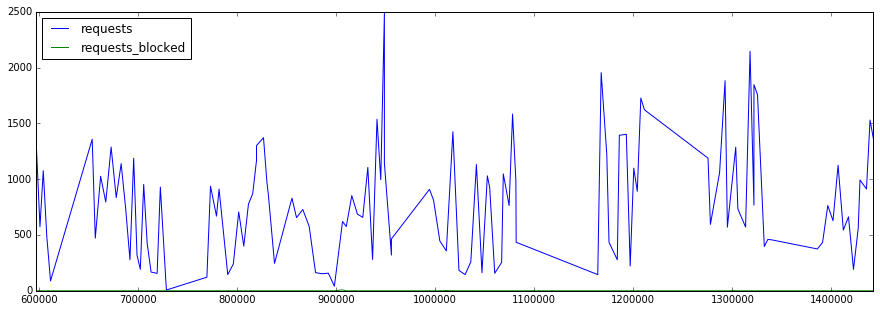

(7, 1937L)


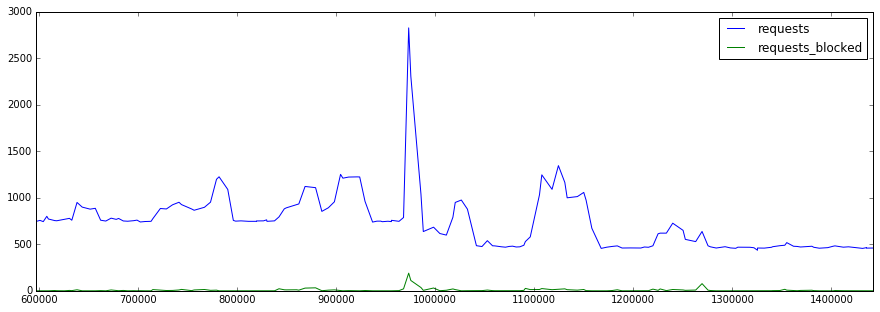

(8, 13125L)


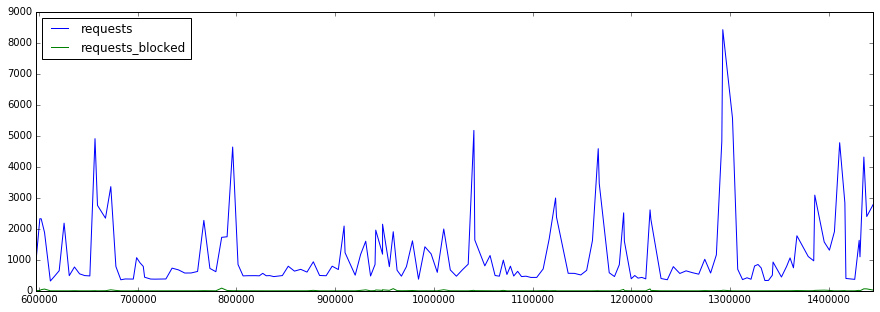

(9, 6416L)


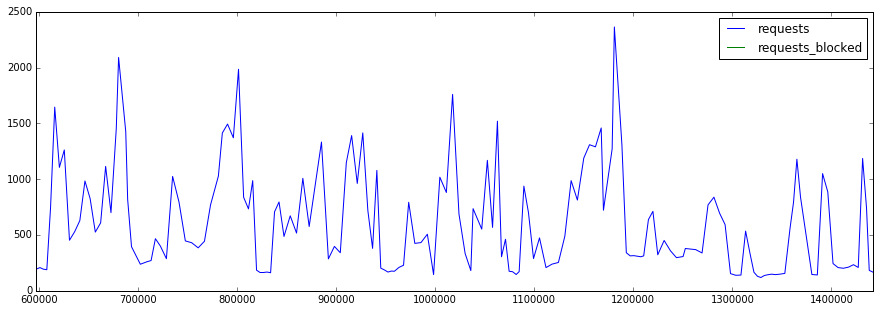

(10, 10349L)


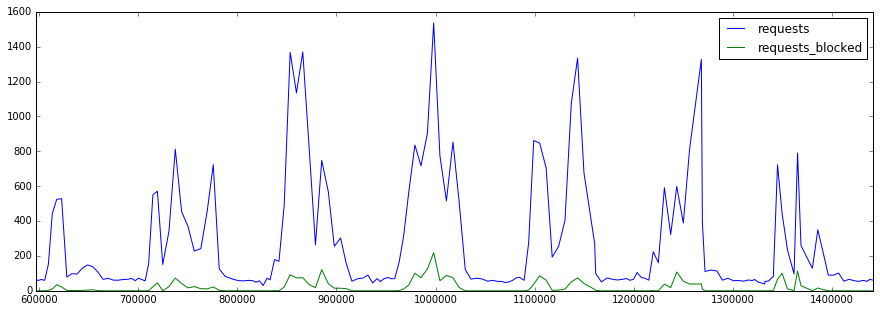

(11, 14957L)


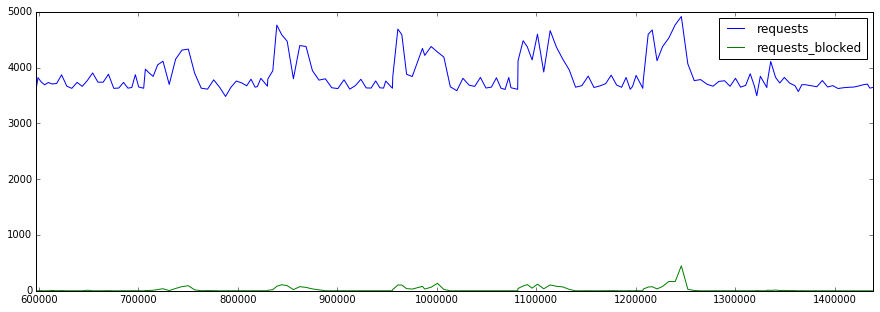

(12, 8474L)


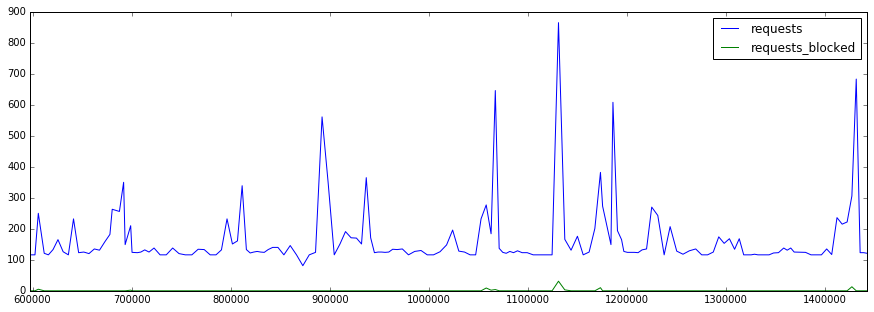

(13, 11911L)


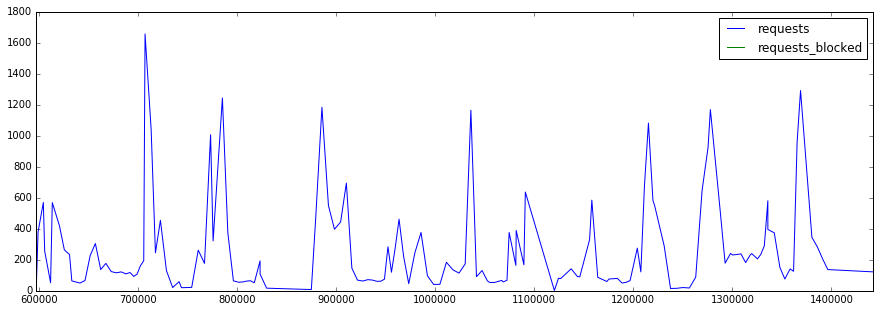

(14, 7673L)


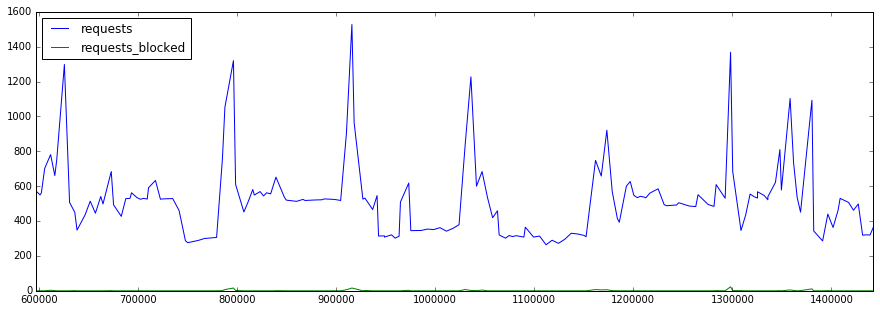

(15, 3375L)


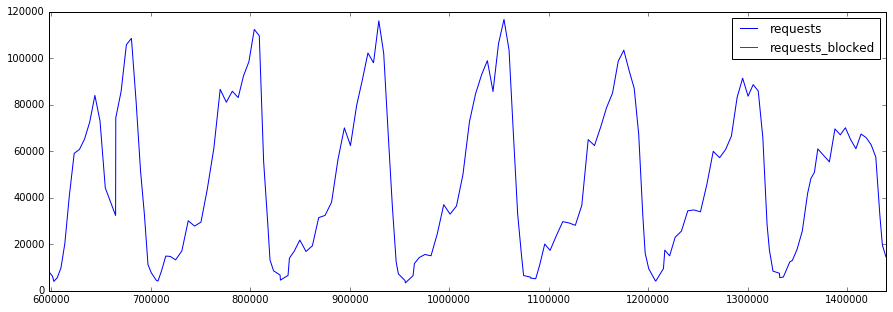

(16, 11623L)


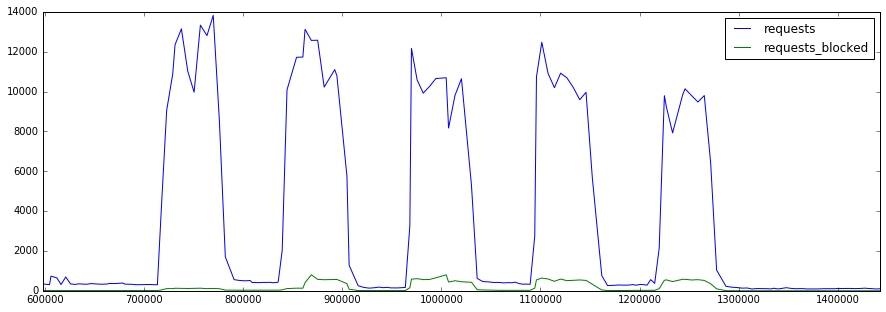

(17, 11175L)


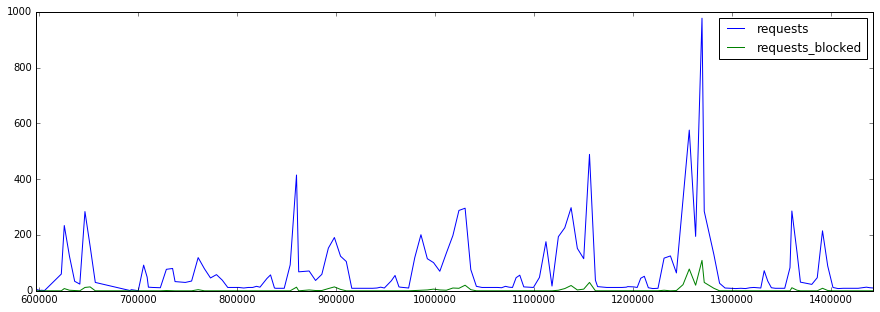

(18, 8425L)


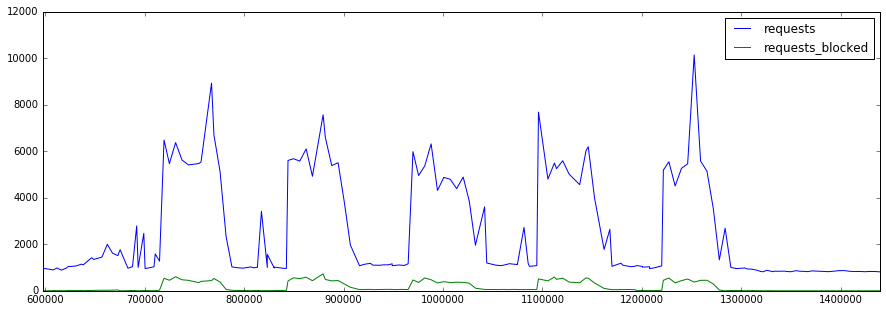

(19, 12667L)


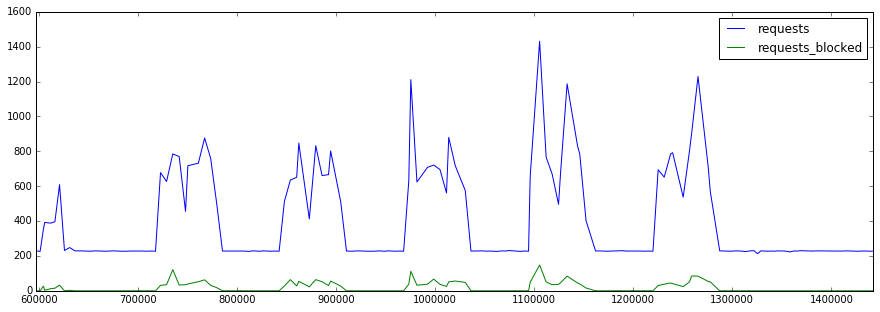

(20, 11545L)


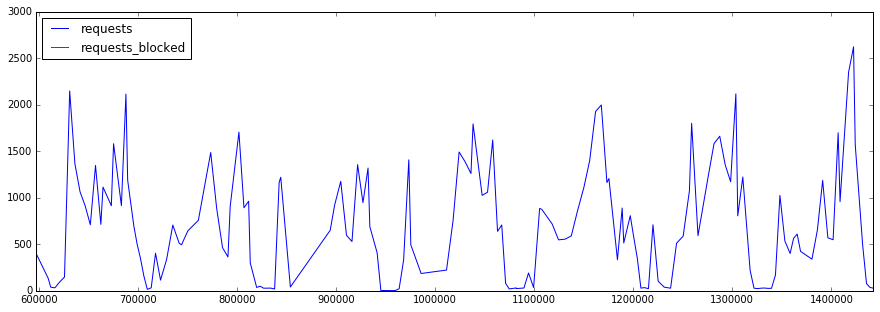

(21, 8887L)


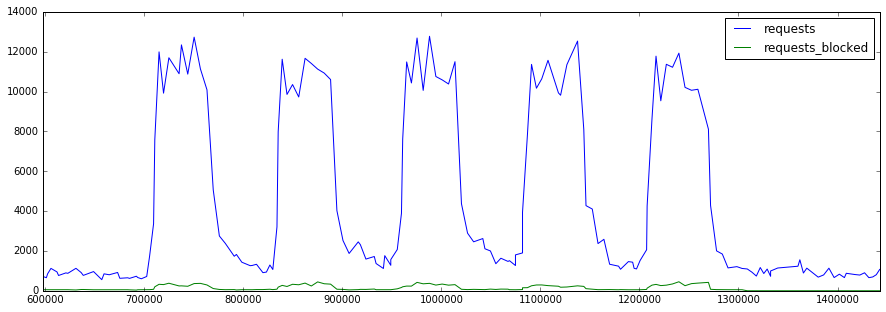

(22, 15085L)


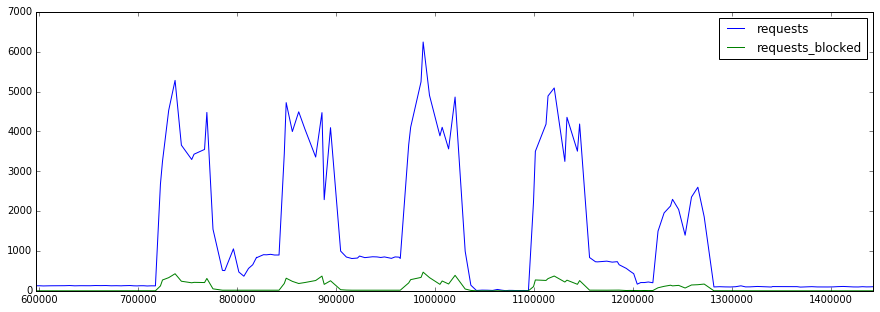

(23, 12244L)


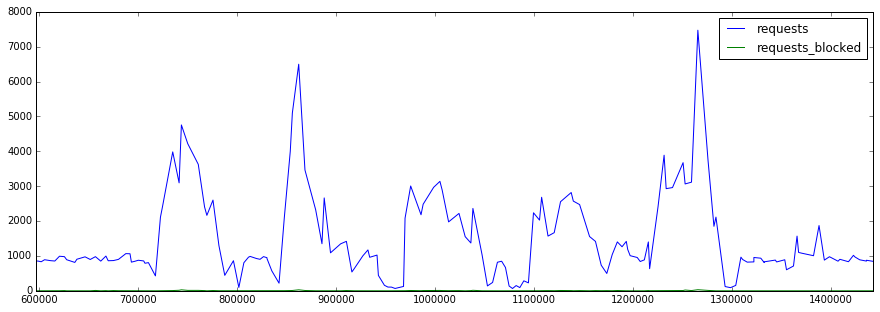

(24, 17276L)


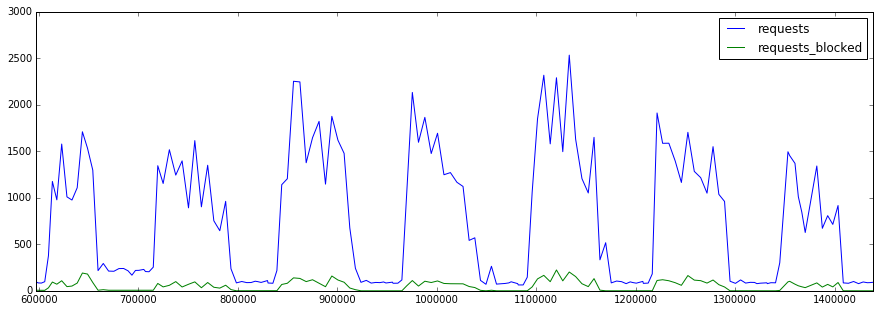

(25, 17463L)


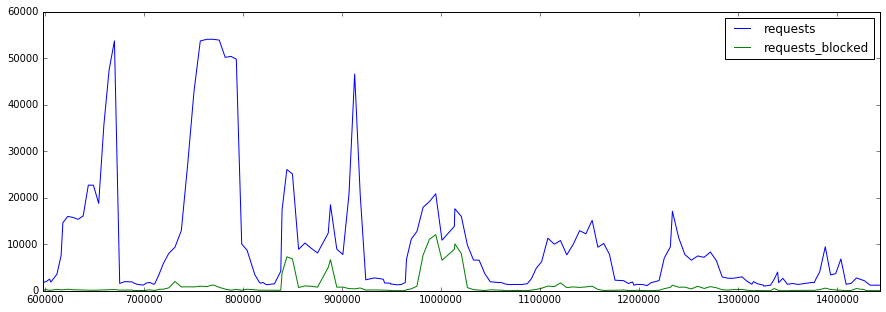

(26, 1652L)


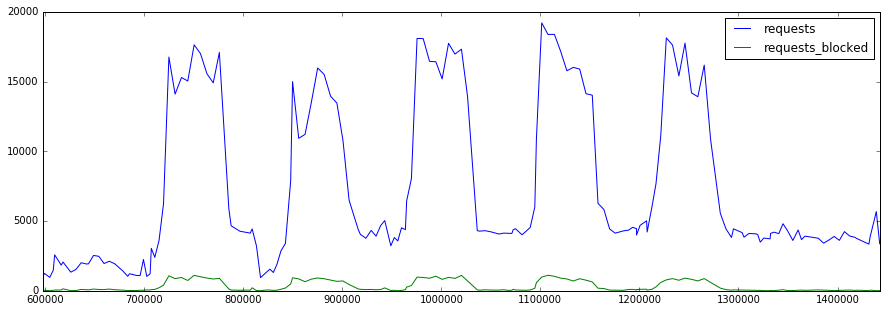

(27, 15453L)


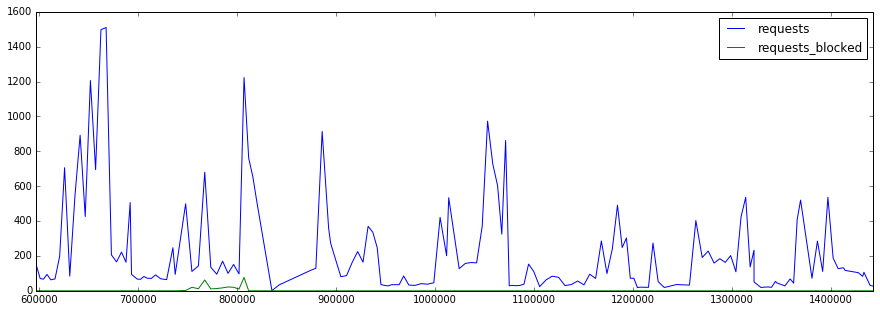

(28, 16981L)


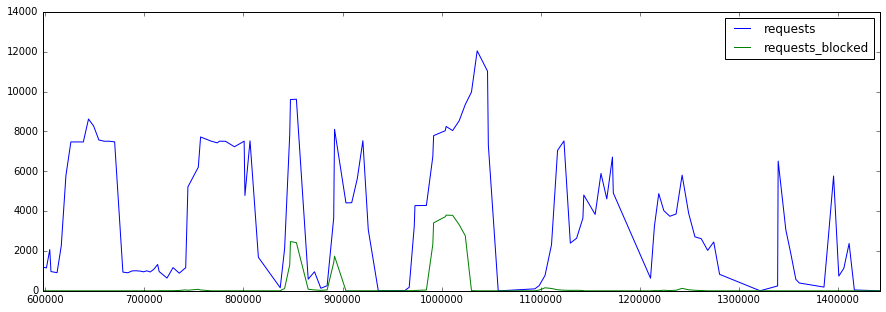

(29, 11164L)


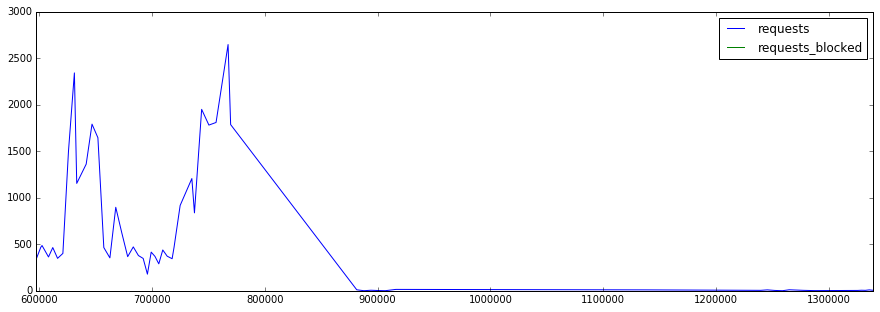

(30, 14931L)


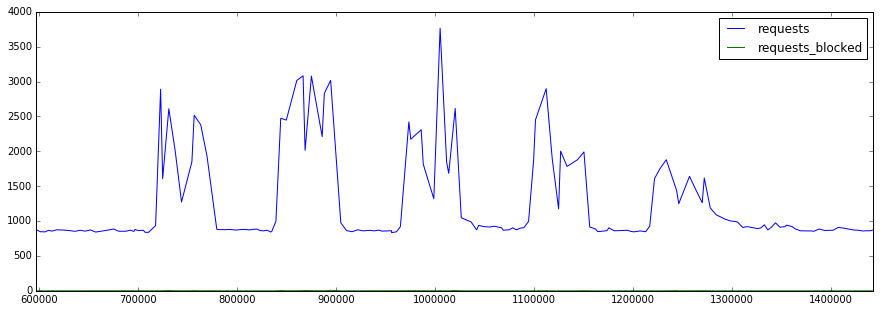

(31, 13305L)


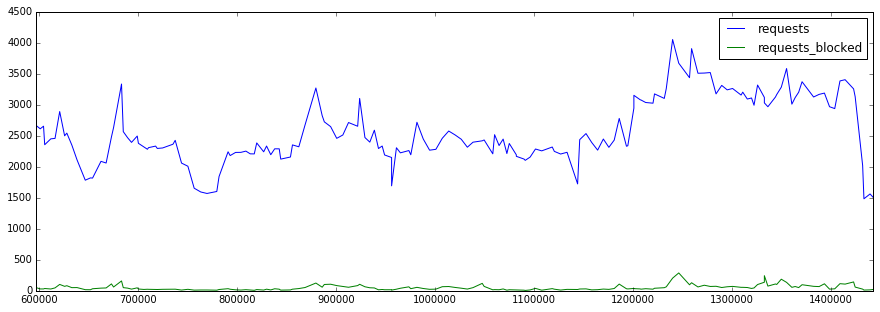

(32, 758L)


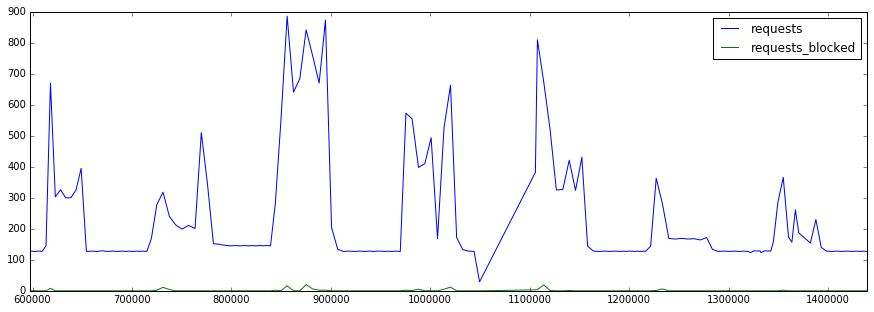

(33, 9810L)


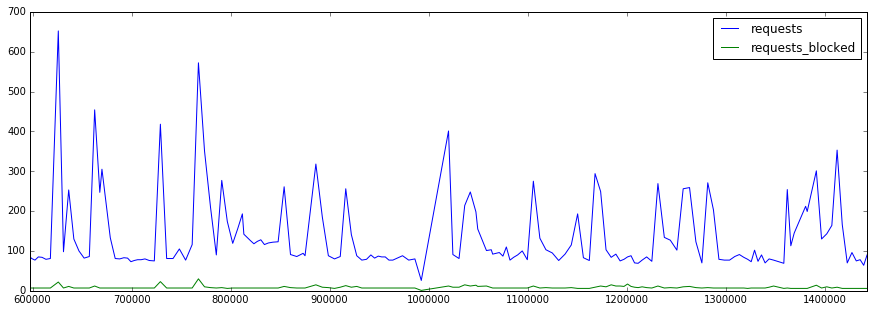

(34, 625L)


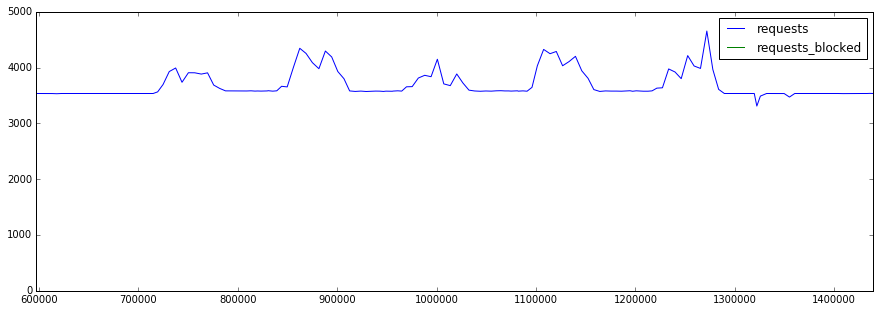

(35, 3296L)


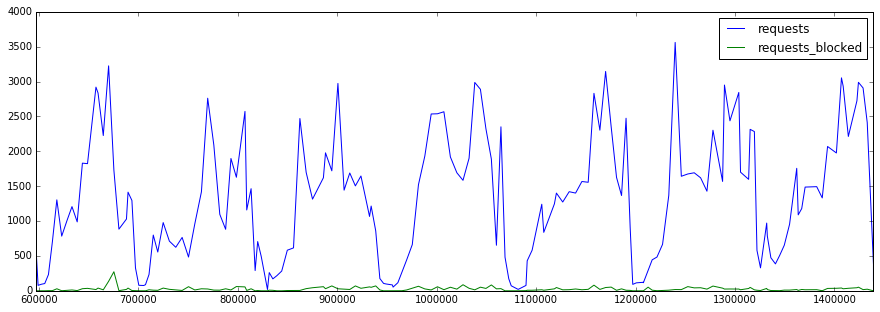

(36, 2410L)


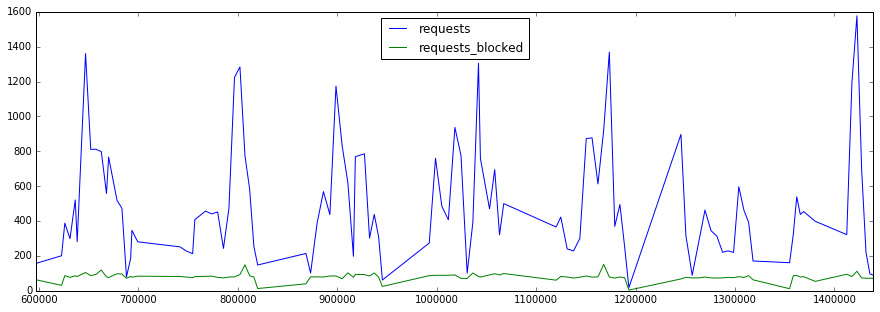

(37, 4786L)


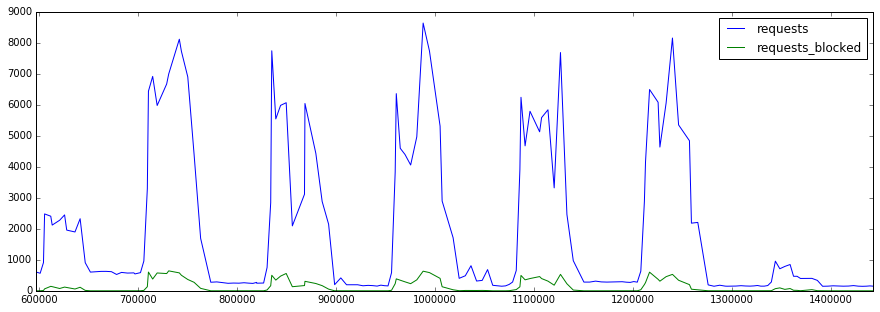

(38, 13173L)


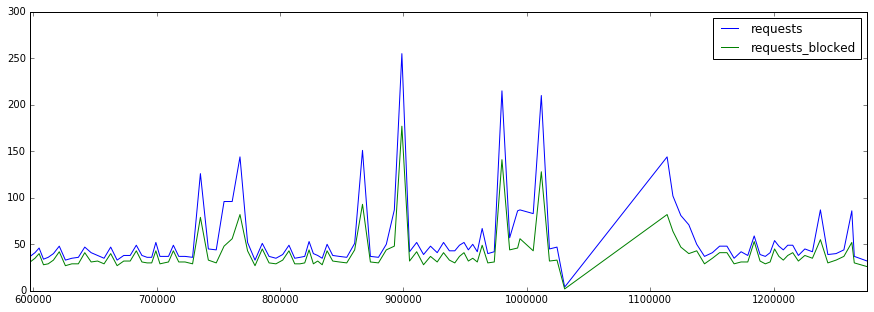

(39, 7824L)


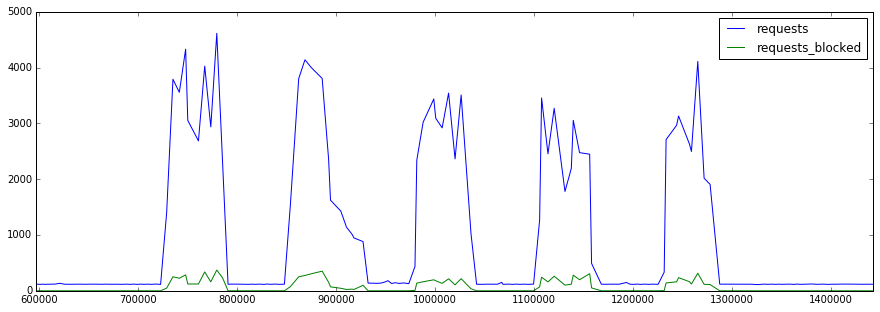

(40, 7517L)


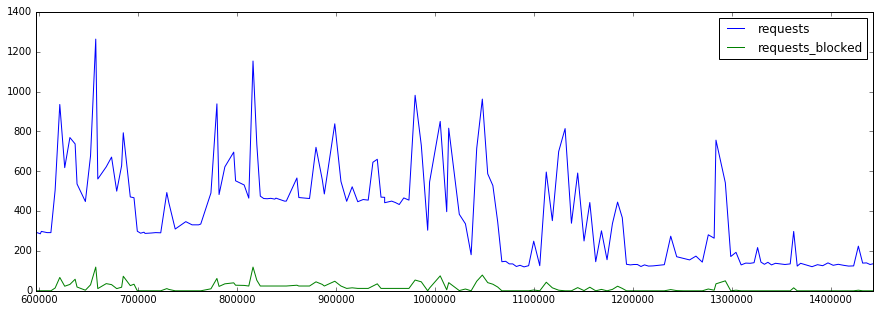

(41, 12671L)


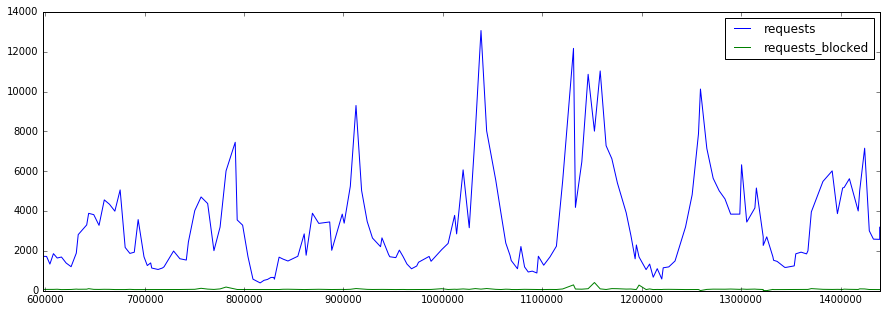

(42, 3942L)


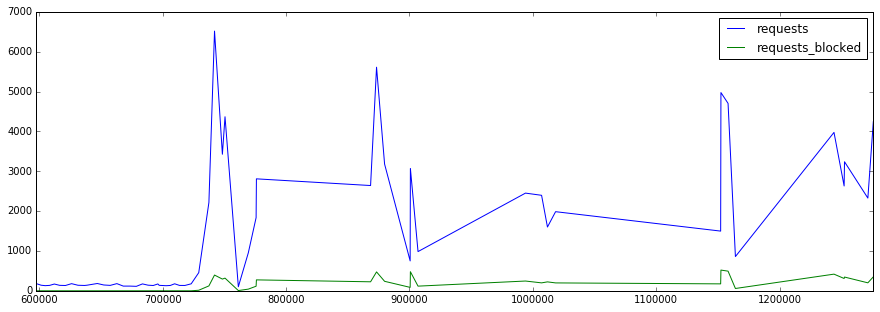

(43, 12036L)


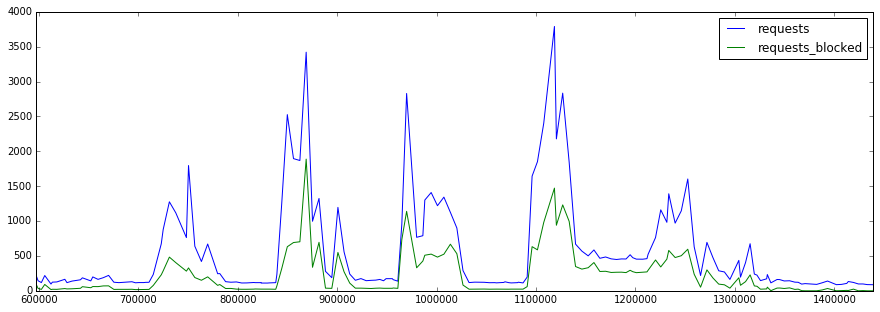

(44, 14523L)


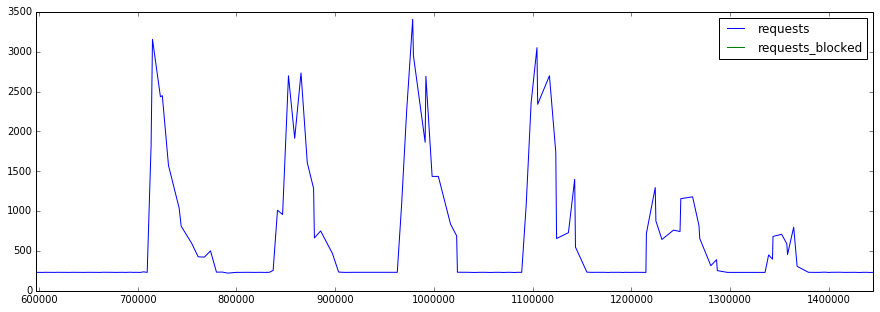

(45, 1981L)


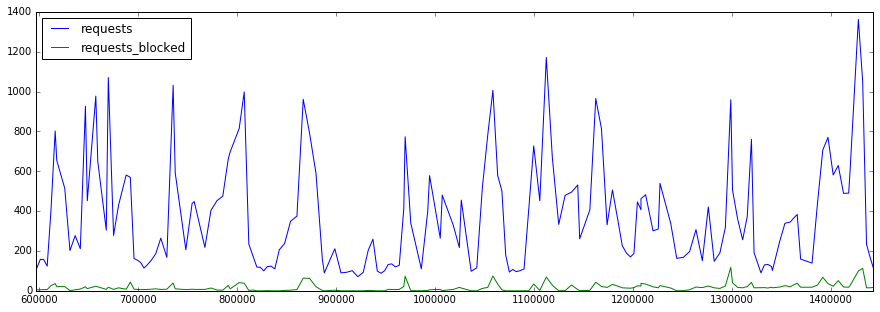

(46, 16607L)


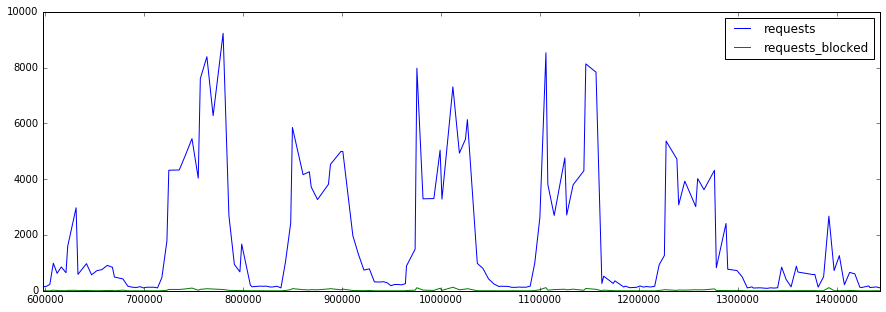

(47, 5546L)


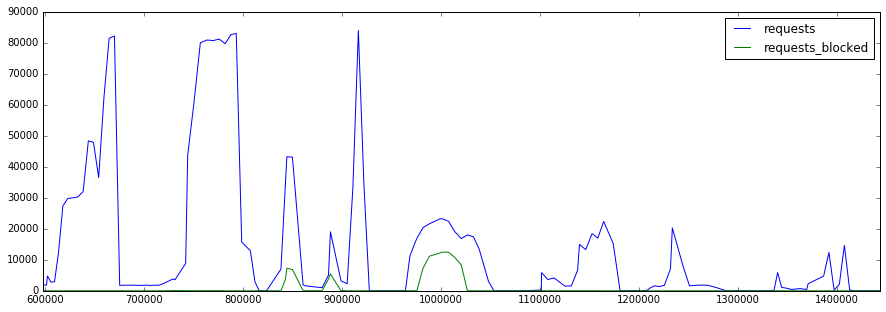

(48, 1414L)


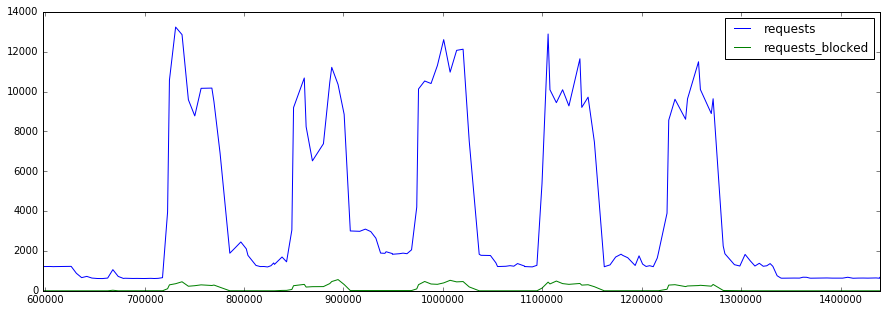

(49, 6966L)


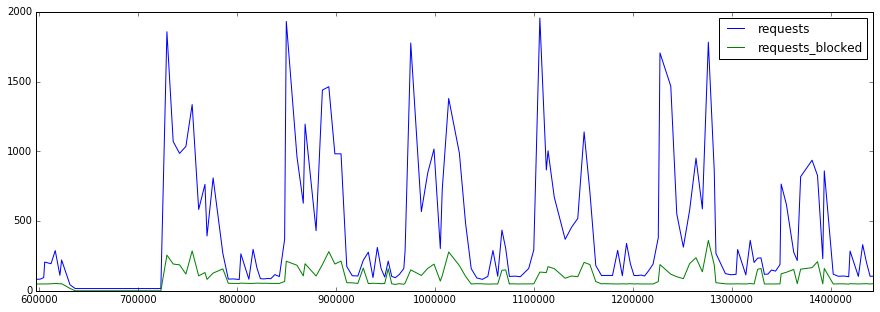

In [2]:
mask = (data['hour'] > '2014-04-06') & (data['hour'] <= '2014-04-13')
for i, n in enumerate(data[mask]['client_id'][:50].tolist()): 
    print(i, n)
    data[['requests', 'requests_blocked']][(data['client_id'] == n) & mask ].plot(figsize=(15,5))
    plt.show()

"В два-ка-семнадцатом бы анализировать данные глазами" - сказал мне мой товарищ, и он, наверное, прав. Тем не менее, для начала создадим небольшие списки с ID клиентов, которые являются cоответственно юридическими и физическими лицами - исключительно на мой субъективный взгляд по визуальной оценке данных за неделю:

In [3]:
law = [14256, 15091, 9765, 1287, 15092, 10349, 14957, 3375, 11623, 8425, 12667, 11545, 8887, 15085, 12244, 17276, 17463, 1652, 14931, 625, 11507]
pers = [9587, 13125,6416,8474,11911,7673, 11175, 15453, 9810, 2410, 13173, 7517, 12036, 1981, 13936, 10260, 10271, 6138, 6322, 12402, 11356]

Что происходит в нижеследующем блоке кода: для каждого клиента мы заменяем отсутствующие значения на NaN, делим данные на отрезки длиной в неделю, получаем фрейм длиной в неделю для этого клиента со средними значениями по всем данным, после чего находим корреляцию каждой "недели" со "средней" по запросам. Далее находим средние значения среди корреляций (хотя я не уверен, что это хорошая идея), и считаем это достаточным решением задачи.

for id = 14256: 
average correlation of requests:            0.827528390472
average correlation of blocked requests: 0.657527043834


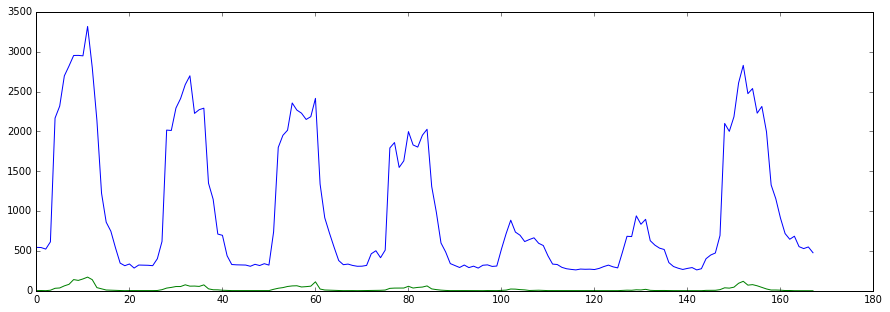

for id = 15091: 
average correlation of requests:            0.704946288065
average correlation of blocked requests: 0.856111742516


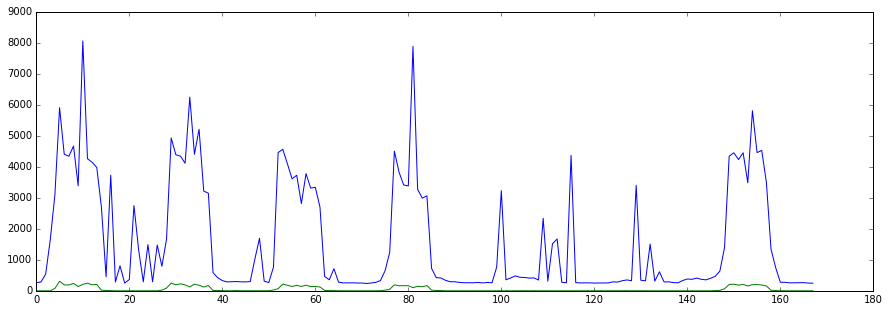

for id = 9765: 
average correlation of requests:            0.456657429239
average correlation of blocked requests: 0.451097591743


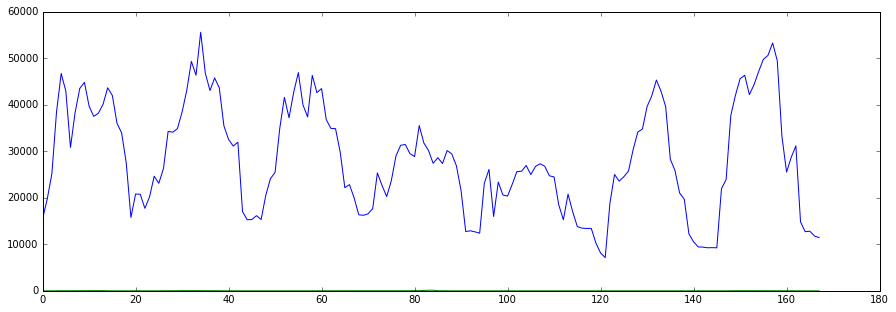

for id = 1287: 
average correlation of requests:            0.691895066879
average correlation of blocked requests: 0.642893492265


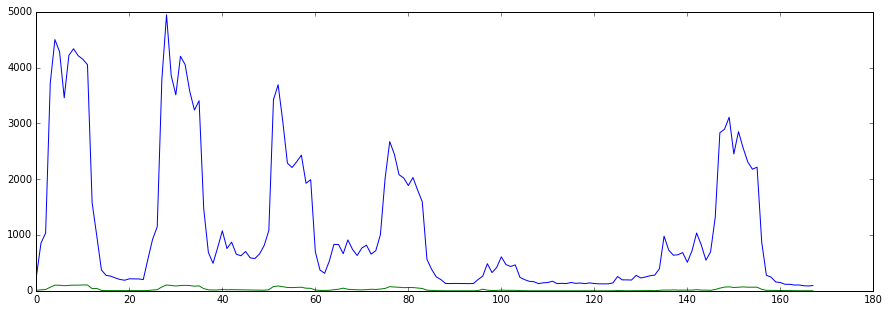

for id = 15092: 
average correlation of requests:            0.799227878907
average correlation of blocked requests: 0.552881753602


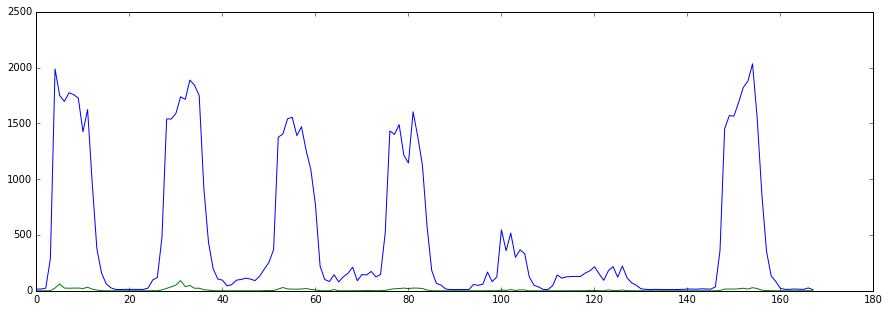

for id = 10349: 
average correlation of requests:            0.75490455187
average correlation of blocked requests: 0.657201715473


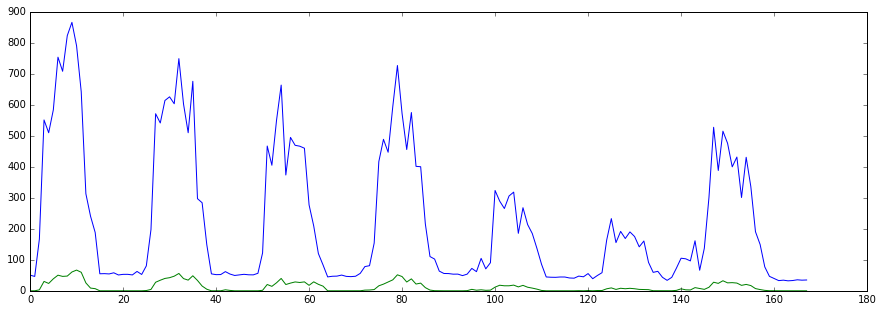

for id = 14957: 
average correlation of requests:            0.612521463498
average correlation of blocked requests: 0.661153150192


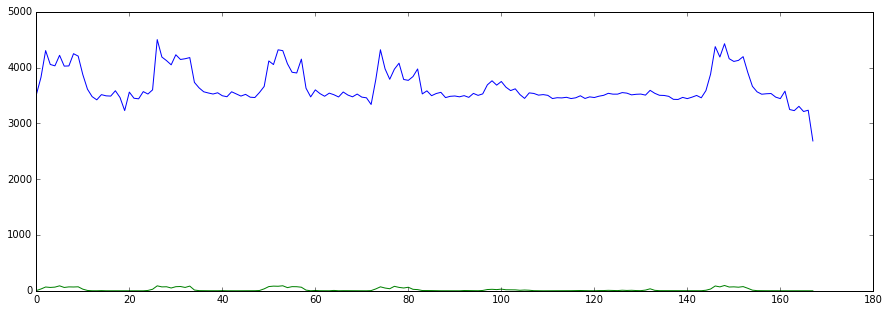

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:22: RuntimeWarning: Mean of empty slice


for id = 3375: 
average correlation of requests:            0.906848530892
average correlation of blocked requests: nan


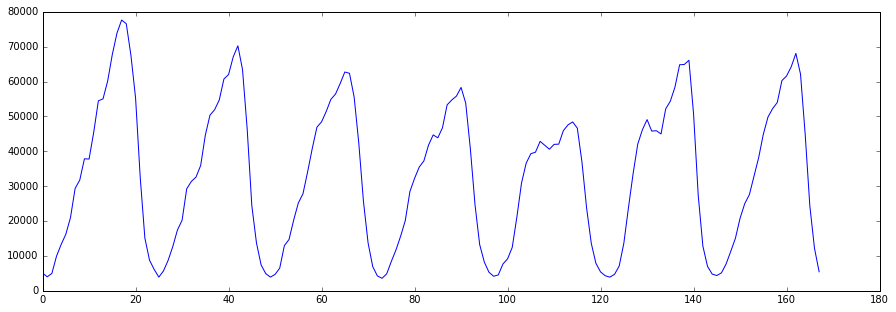

for id = 11623: 
average correlation of requests:            0.925217391413
average correlation of blocked requests: 0.910099040397


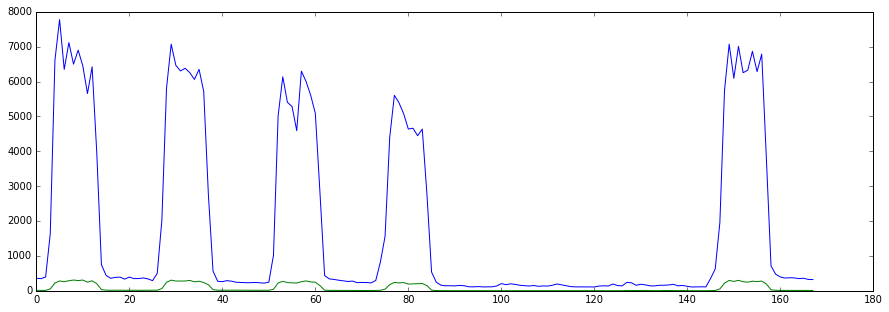

for id = 8425: 
average correlation of requests:            0.588939205198
average correlation of blocked requests: 0.900280897598


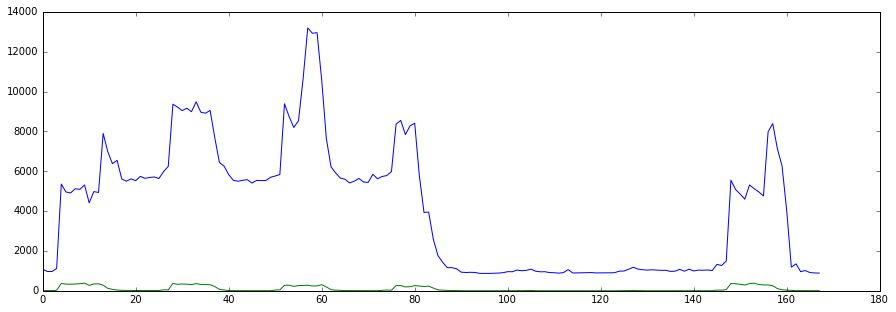

for id = 12667: 
average correlation of requests:            0.762751396566
average correlation of blocked requests: 0.674734612455


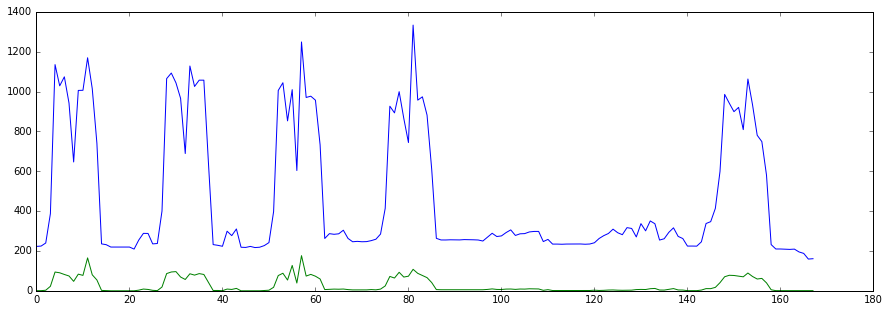

for id = 11545: 
average correlation of requests:            0.221599688335
average correlation of blocked requests: nan


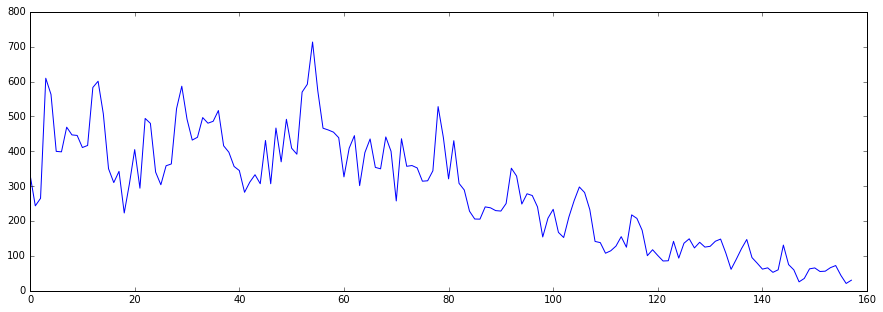

for id = 8887: 
average correlation of requests:            0.919587737929
average correlation of blocked requests: 0.842805225992


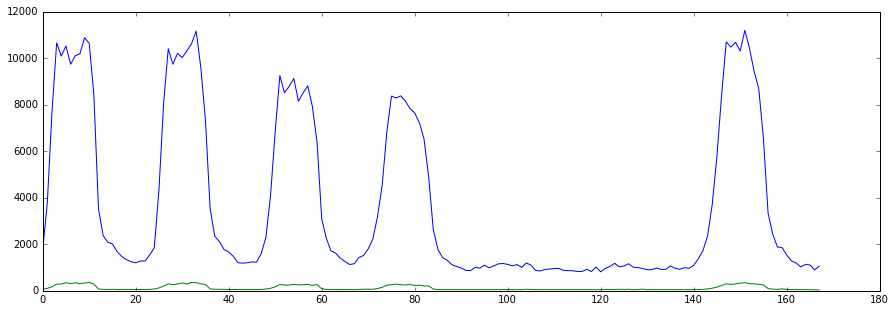

for id = 15085: 
average correlation of requests:            0.540979440668
average correlation of blocked requests: 0.500419484865


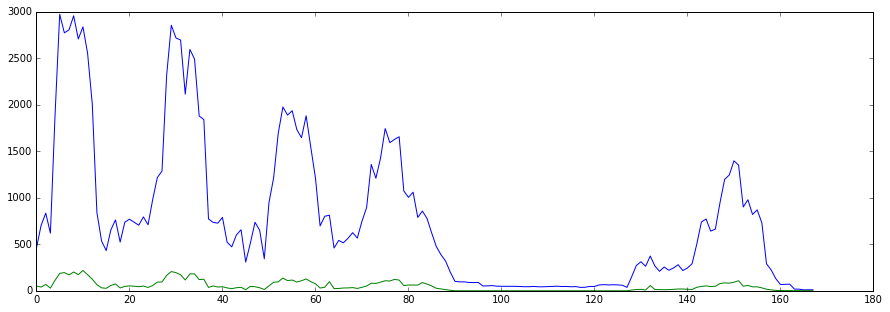

for id = 12244: 
average correlation of requests:            0.825732328069
average correlation of blocked requests: 0.691093467718


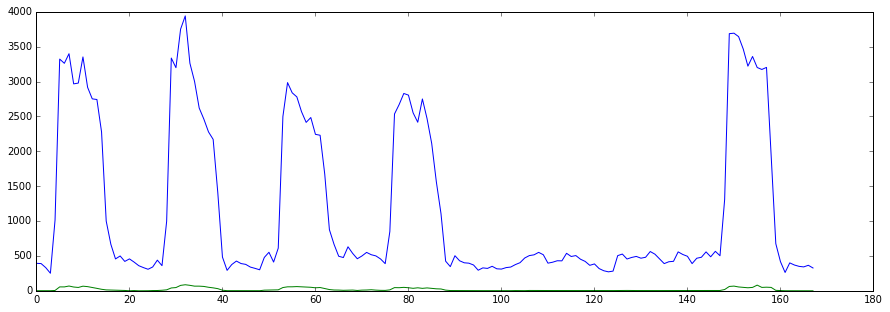

for id = 17276: 
average correlation of requests:            0.893992245714
average correlation of blocked requests: 0.758018282348


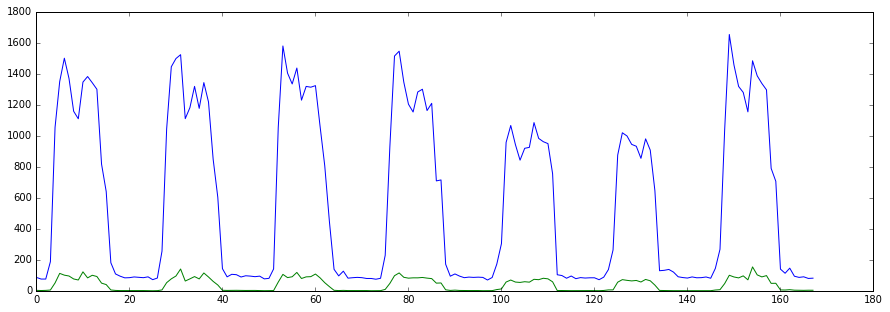

for id = 17463: 
average correlation of requests:            0.511780711225
average correlation of blocked requests: 0.77115086833


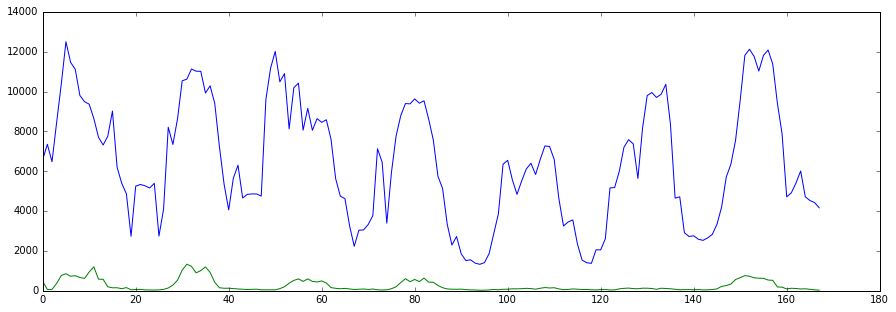

for id = 1652: 
average correlation of requests:            0.937900875551
average correlation of blocked requests: 0.931584412352


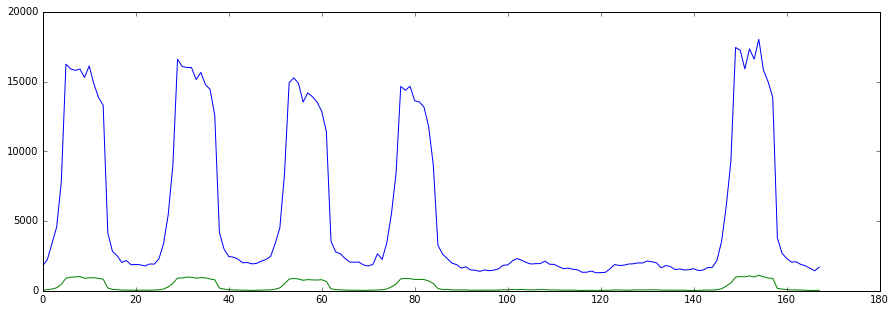

for id = 14931: 
average correlation of requests:            0.799892291022
average correlation of blocked requests: 0.510409173787


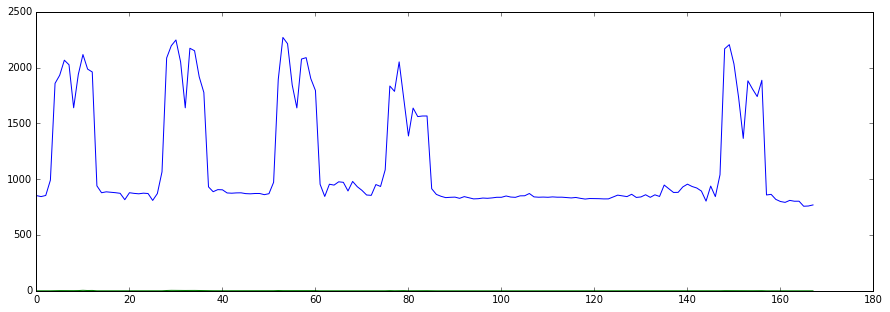

for id = 625: 
average correlation of requests:            0.763581237
average correlation of blocked requests: nan


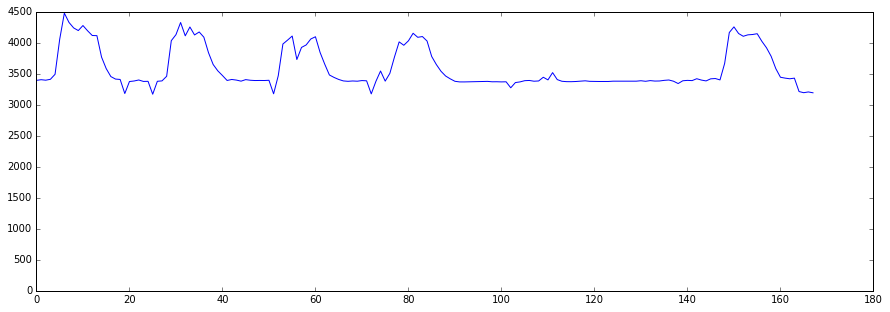

for id = 11507: 
average correlation of requests:            0.601664569824
average correlation of blocked requests: 0.700536414927


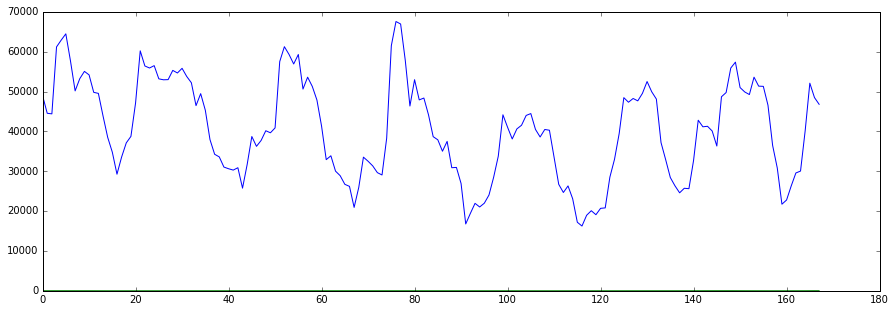

In [4]:
def solution(i, extra_output=False):
    r = pd.date_range('2014-04-01 00:00','2014-07-21 23:00:00', freq= "H")
    weeks = pd.date_range('2014-04-01 00:00','2014-07-22 23:00:00', freq= "W-TUE")

    a = data[(data['client_id'] == i)]
    a.index = pd.DatetimeIndex(a['hour'])
    a = a.reindex(r, fill_value=np.nan)
    accumulated = pd.DataFrame(np.nan, index=range(168), columns=['requests', 'requests_blocked'])

    for w, w2 in zip(weeks[:-1], weeks[1:]):
        mask = (a['hour'] >= str(w)) & (a['hour'] < str(w2))
        b = a[mask][['requests', 'requests_blocked']].reset_index(drop=True)
        accumulated = accumulated.add(b, fill_value=0)

    average = accumulated.apply(lambda x:x/len(weeks))
    sims = []

    for w, w2 in zip(weeks[:-1], weeks[1:]):
        mask = (a['hour'] >= str(w)) & (a['hour'] < str(w2))
        b = a[mask][['requests', 'requests_blocked']].reset_index(drop=True)
        sims.append(b.corrwith(average, axis=0).values.tolist())
    res = [np.nanmean([j[0] for j in sims]), np.nanmean([j[1] for j in sims])]

    if(extra_output):
        print("for id = {0}: \naverage correlation of requests:\
            {1}\naverage correlation of blocked requests: {2}".format(i, \
            res[0], res[1]))

        fig = plt.figure(figsize=(15,5))
        plt.plot(average[['requests','requests_blocked']])
        plt.show()

    if res[0] > 0.6 or res[1] > 0.5:
        return "{0}: law".format(i)
    else:
        return "{0}: person".format(i)
            

for cl in law:
    solution(cl, True)

Посмотрев глазами на вывод для вышеприведенных списков клиентов, можно обнаружить, что среднее значение корреляции данных для юридических лиц находится в области от 0.6, а для физических лиц, как правило, не превышает 0.5.
Разумеется, это неточно, но можно сказать, что такое решение даст лучший результат, чем случайный выбор ответа.

In [5]:
from random import randint

clients = data.groupby(data['client_id']).first().index

solution(randint(0,len(clients)))

'15416: law'